## Polynomial curve fitting

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
# Generar datos sinusoidales
np.random.seed(42)
n_points = 100
x = np.linspace(0, 1, n_points)
y_true = np.sin(4 * np.pi * x)
noise = np.random.normal(0, 0.1, n_points)
y = y_true + noise

# Grado del polinomio
degree = 5

In [3]:
## 1. Generar matriz de Vandermonde
V = np.vander(x, degree + 1,increasing=True)
## 2. Implementación de la matriz Φ (Chebyshev)
v_chev = np.polynomial.chebyshev.chebvander(x,degree)
## 3. Implementación de la matriz Φ (Legendre)
v_leg = np.polynomial.legendre.legvander(x,degree)



x_scaled = 2 * x - 1

In [4]:
def chebyshev_design_matrix(x, degree):
    """
    Construye la matriz de diseño usando polinomios de Chebyshev (T_k).
    
    Parámetros
    ----------
    x : array (N,)
        Datos de entrada en [-1, 1]
    degree : int
        Grado máximo
    
    Retorna
    -------
    Phi : array (N, degree+1)
        Matriz de diseño
    """
    N = len(x)
    Phi = np.zeros((N, degree + 1))

    for k in range(degree + 1):
        if k == 0:  
            Phi[:, k] = np.ones(N)
        elif  k == 1:
            Phi[:,k] = x
            # Caso base T_1(x) = x
            Phi[:, k] = x

        else:
            Tk =  2*x*Phi[:,k-1] - Phi[:,k-2]
            Phi[:, k] = Tk

    return Phi

Phi_custom = chebyshev_design_matrix(x_scaled, degree)

# 2. Matriz de comparación con NumPy
from numpy.polynomial.chebyshev import chebvander
Phi_numpy = chebvander(x_scaled, degree)

# 3. Cálculo de la diferencia (ola)
ola = Phi_custom - Phi_numpy
print(ola)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

In [5]:
def legendre_design_matrix(x, degree):
    """
    Construye la matriz de diseño usando polinomios de Legendre.
    
    Parámetros
    ----------
    x : array (N,)
        Datos de entrada en [-1, 1]
    degree : int
        Grado máximo del polinomio
    
    Retorna
    -------
    Phi : array (N, degree+1)
        Matriz de diseño
    """
    N = len(x)
    Phi = np.zeros((N, degree + 1))

    for k in range(degree + 1):
        if k == 0:  
            Phi[:, k] = np.ones(N)
        elif  k == 1:
            Phi[:,k] = x

        else:
            Tk =  (2*k-1)*x*Phi[:,k-1] - (k-1)*Phi[:,k-2]
            Phi[:, k] = Tk/(k)

    return Phi



Phi_custom = legendre_design_matrix(x_scaled, degree)

Phi_numpy= np.polynomial.legendre.legvander(x_scaled,degree)
ola = Phi_custom - Phi_numpy

print(ola)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.22044605e-16
  -4.44089210e-16  6.66133815e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.22044605e-16 -3.33066907e-16
   2.22044605e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
  -3.33066907e-16  3.46944695e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.66533454e-16
  -2.22044605e-16  1.80411242e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.77555756e-17]
 [ 0.00000000e+00  0.00000000e+00  2.22044605e-16 -3.33066907e-16
   3.88578059e-16 -3.33066907e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.38777878e-16
   2.22044605e-16 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00 -2.22044605e-16  2.77555756e-16
  -2.22044605e-16  1.6653

In [6]:
# 1. Ajuste con CVXPY

# Crear la matriz de Vandermonde

A = np.vander(x_scaled, degree + 1,increasing=True)


# Definir la variable y resolver el problema de optimización
beta_cvx = cp.Variable(degree+1)
objective = cp.Minimize(cp.norm2(A@ beta_cvx - y)**2)
problem = cp.Problem(objective)
problem.solve()

coeff_cvx = beta_cvx.value

print(problem.value)

5.844662420637407


In [7]:
# 2. Solución cerrada
coeff_closed = np.linalg.inv(A.T @ A) @ A.T @ y

In [8]:
# 3. Usando numpy.polyfit
coeff_numpy = np.polyfit(x_scaled,y,degree)

# Comparar los resultados
print("Coeficientes obtenidos:")
print(f"CVXPY:       {coeff_cvx}\n")
print(f"Sol. Cerrada: {coeff_closed}\n")
print(f"Numpy:       {coeff_numpy}\n")

Coeficientes obtenidos:
CVXPY:       [-5.77932661e-03  4.00954742e+00 -8.79506147e-02 -1.74538405e+01
  1.21574200e-01  1.39432762e+01]

Sol. Cerrada: [-5.77932661e-03  4.00954742e+00 -8.79506147e-02 -1.74538405e+01
  1.21574200e-01  1.39432762e+01]

Numpy:       [ 1.39432762e+01  1.21574200e-01 -1.74538405e+01 -8.79506147e-02
  4.00954742e+00 -5.77932661e-03]



In [9]:
# Representar los resultados
x_fit = np.linspace(0, 1, 500)
x_fit = 2 *x_fit-1
y_fit_cvx = np.polyval(coeff_cvx[::-1], x_fit)
y_fit_closed = np.polyval(coeff_closed[::-1], x_fit)
y_fit_numpy = np.polyval(coeff_numpy, x_fit)

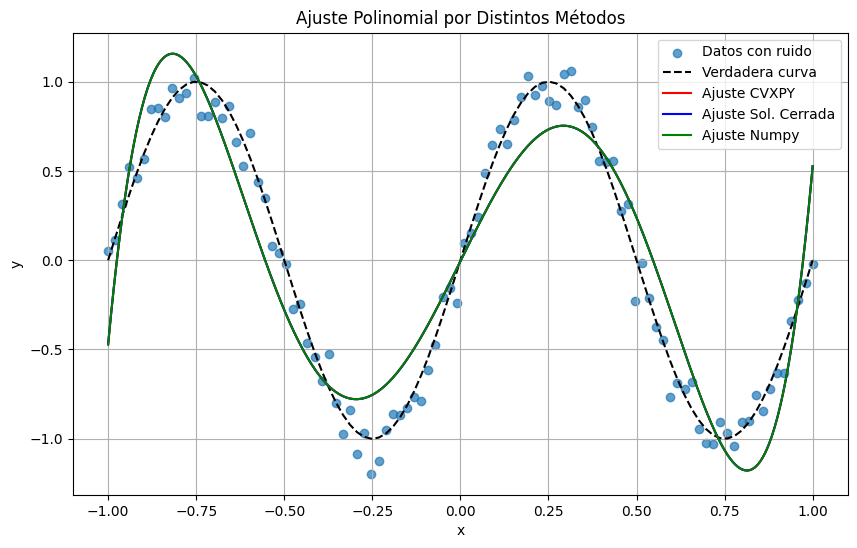

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y, label="Datos con ruido", alpha=0.7)
plt.plot(x_scaled, y_true, label="Verdadera curva", color="black", linestyle="--")
plt.plot(x_fit, y_fit_cvx, label="Ajuste CVXPY", color="red")
plt.plot(x_fit, y_fit_closed, label="Ajuste Sol. Cerrada", color="blue")
plt.plot(x_fit, y_fit_numpy, label="Ajuste Numpy", color="green")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste Polinomial por Distintos Métodos")
plt.grid()
plt.show()

In [11]:
    # Cálculo del error de estimación del polinomio con respecto al real

# --- Cálculo del Error Cuadrático Medio (MSE) respecto a la curva real ---

# Calculamos las predicciones de cada modelo sobre los puntos originales (x_scaled)
# Nota: Revertimos el orden de los coeficientes para np.polyval cuando sea necesario
y_pred_cvx = np.polyval(coeff_cvx[::-1], x_scaled)
y_pred_closed = np.polyval(coeff_closed[::-1], x_scaled)
y_pred_numpy = np.polyval(coeff_numpy, x_scaled)

# Cálculo del MSE: promedio de las diferencias al cuadrado con y_true
mse_cvx = np.mean((y_pred_cvx - y_true)**2)
mse_closed = np.mean((y_pred_closed - y_true)**2)
mse_numpy = np.mean((y_pred_numpy - y_true)**2)

print("Error Cuadrático Medio (MSE) respecto a la curva real:")
print(f"CVXPY:         {mse_cvx:.8f}")
print(f"Sol. Cerrada:  {mse_closed:.8f}")
print(f"Numpy:         {mse_numpy:.8f}")

# Opcional: Error relativo global (Norma de la diferencia)
error_rel_cvx = np.linalg.norm(y_pred_cvx - y_true) / np.linalg.norm(y_true)
print(f"\nError relativo (Norma): {error_rel_cvx:.8f}")

Error Cuadrático Medio (MSE) respecto a la curva real:
CVXPY:         0.05120317
Sol. Cerrada:  0.05120317
Numpy:         0.05120317

Error relativo (Norma): 0.32162205


## Polynomial curve fitting con regularización

<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_39911/2058943294.py:37: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_fit, y_fit_ridge, label=f"Ridge Regression ($\lambda$={lambda_reg})", color="purple", linewidth=2)


Coeficientes Ridge (CVXPY):
[-0.00818957  1.65153955 -0.06582557 -7.29960401  0.09704406  5.28262918]


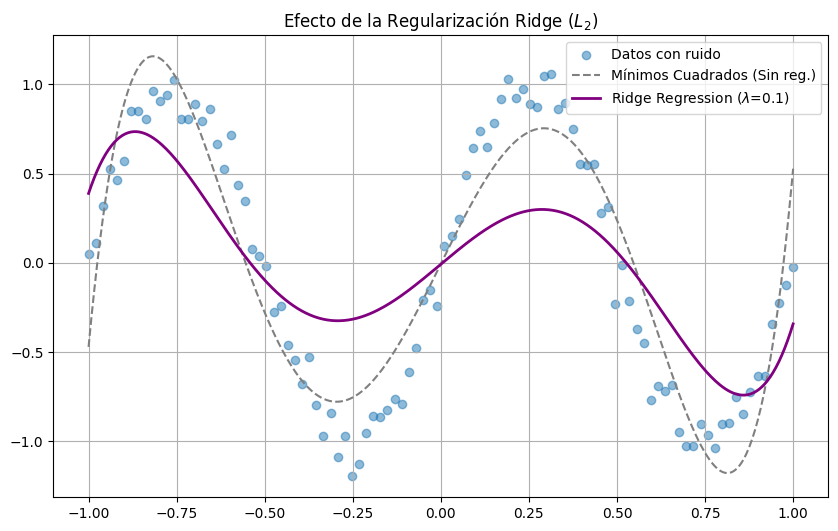

MSE Ridge respecto a curva real: 0.17370510


In [16]:
lambda_reg = 0.1

# 1. Ajuste con L2-norm (Ridge Regression) usando CVXPY

import cvxpy as cp


# Definir la variable de optimización (coeficientes)
beta_ridge = cp.Variable(degree + 1)

# Función objetivo: Error cuadrático + penalización L2
# La norma 2 al cuadrado de los coeficientes: ||beta||_2^2
cost = cp.sum_squares(A @ beta_ridge - y) + lambda_reg * cp.sum_squares(beta_ridge)

prob_ridge = cp.Problem(cp.Minimize(cost))
prob_ridge.solve()

coeff_ridge_cvx = beta_ridge.value

# 2. Solución cerrada de Ridge Regression
# La fórmula es: beta = (A.T @ A + lambda * I)^1 @ A.T @ y
I = np.eye(degree + 1)
# A menudo no se penaliza el término de intercepto (columna 0), 
# pero para simplicidad penalizaremos todos:
coeff_ridge_closed = np.linalg.inv(A.T @ A + lambda_reg * I) @ A.T @ y

# 3. Comparación de coeficientes (observa cómo se "encogen" respecto a los anteriores)
print("Coeficientes Ridge (CVXPY):")
print(coeff_ridge_cvx)

# Visualización del efecto de la regularización
y_fit_ridge = np.polyval(coeff_ridge_cvx[::-1], x_fit)

plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y, alpha=0.5, label="Datos con ruido")
plt.plot(x_fit, y_fit_cvx, '--', label="Mínimos Cuadrados (Sin reg.)", color="gray")
plt.plot(x_fit, y_fit_ridge, label=f"Ridge Regression ($\lambda$={lambda_reg})", color="purple", linewidth=2)
plt.title("Efecto de la Regularización Ridge ($L_2$)")
plt.legend()
plt.grid(True)
plt.show()

# Error de estimación con Ridge
y_pred_ridge = np.polyval(coeff_ridge_cvx[::-1], x_scaled)
mse_ridge = np.mean((y_pred_ridge - y_true)**2)
print(f"MSE Ridge respecto a curva real: {mse_ridge:.8f}")


Coeficientes Lasso:
[-1.25000e-02  3.90730e+00 -2.40000e-02 -1.70190e+01  5.04000e-02
  1.35741e+01]

Número de coeficientes cercanos a cero: 0


<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_39911/3436983937.py:31: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_fit, y_fit_lasso, label=f"Lasso ($L_1$, $\lambda$={lambda_lasso})", color="orange", linewidth=2)


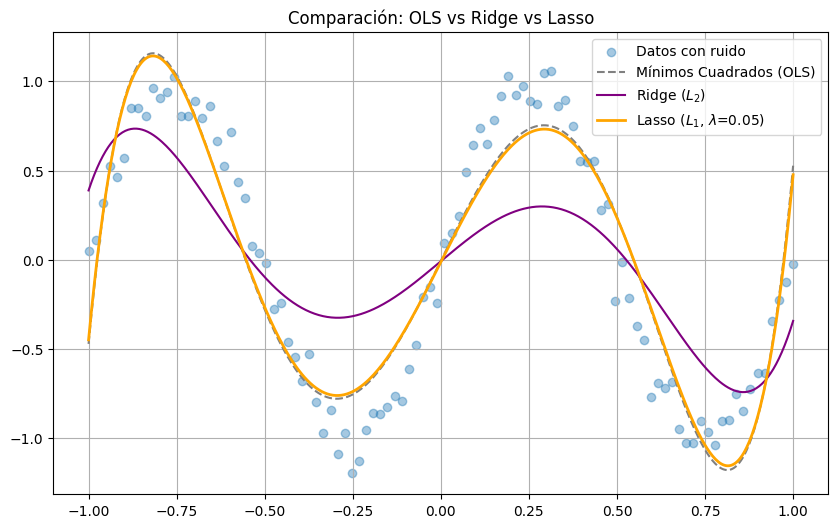

In [17]:
# 2. Ajuste con L1-norm (Lasso Regression) usando CVXPY


# 2. Ajuste con L1-norm (Lasso Regression) usando CVXPY
lambda_lasso = 0.05  # Usamos un lambda ligeramente menor para observar el efecto

# Definir la variable de optimización
beta_lasso = cp.Variable(degree + 1)

# Función objetivo: Error cuadrático + penalización L1
# La norma 1 es la suma de los valores absolutos: cp.norm1(beta)
cost_lasso = cp.sum_squares(A @ beta_lasso - y) + lambda_lasso * cp.norm1(beta_lasso)

prob_lasso = cp.Problem(cp.Minimize(cost_lasso))
prob_lasso.solve()

coeff_lasso = beta_lasso.value

# Comparación de raleza (Sparsity)
print("Coeficientes Lasso:")
print(np.round(coeff_lasso, 4))
print(f"\nNúmero de coeficientes cercanos a cero: {np.sum(np.abs(coeff_lasso) < 1e-4)}")

# Visualización
y_fit_lasso = np.polyval(coeff_lasso[::-1], x_fit)

plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y, alpha=0.4, label="Datos con ruido")
plt.plot(x_fit, y_fit_cvx, '--', label="Mínimos Cuadrados (OLS)", color="gray")
plt.plot(x_fit, y_fit_ridge, label="Ridge ($L_2$)", color="purple")
plt.plot(x_fit, y_fit_lasso, label=f"Lasso ($L_1$, $\lambda$={lambda_lasso})", color="orange", linewidth=2)
plt.title("Comparación: OLS vs Ridge vs Lasso")
plt.legend()
plt.grid(True)
plt.show()

--- Comparación Ridge ---
Diferencia entre CVXPY y Solución Cerrada: 4.3259912995e-14
Coeficientes (Sol. Cerrada): 
[-0.00818957  1.65153955 -0.06582557 -7.29960401  0.09704406  5.28262918]


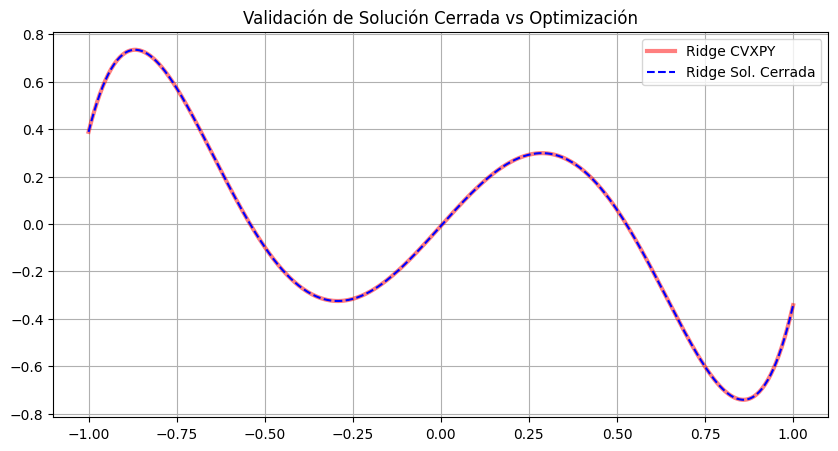

In [19]:
# Solución cerrada para Ridge
# 3. Solución cerrada para Ridge
# Definimos la matriz identidad de tamaño (degree + 1)
I = np.eye(degree + 1)

# Calculamos la solución cerrada usando el lambda_reg definido anteriormente
# Nota: np.linalg.inv puede ser inestable; np.linalg.solve es preferible numéricamente
coeff_ridge_closed = np.linalg.solve(A.T @ A + lambda_reg * I, A.T @ y)

# Comprobación de fidelidad entre CVXPY y Solución Cerrada
diferencia = np.linalg.norm(coeff_ridge_cvx - coeff_ridge_closed)

print("--- Comparación Ridge ---")
print(f"Diferencia entre CVXPY y Solución Cerrada: {diferencia:.10e}")
print(f"Coeficientes (Sol. Cerrada): \n{coeff_ridge_closed}")

# Visualización para verificar que coinciden
y_fit_ridge_closed = np.polyval(coeff_ridge_closed[::-1], x_fit)

plt.figure(figsize=(10, 5))
plt.plot(x_fit, y_fit_ridge, 'r-', label="Ridge CVXPY", linewidth=3, alpha=0.5)
plt.plot(x_fit, y_fit_ridge_closed, 'b--', label="Ridge Sol. Cerrada")
plt.title("Validación de Solución Cerrada vs Optimización")
plt.legend()
plt.grid(True)
plt.show()



Forma de x_fit: (500,)
Forma de y_fit_ridge_closed: (500,)


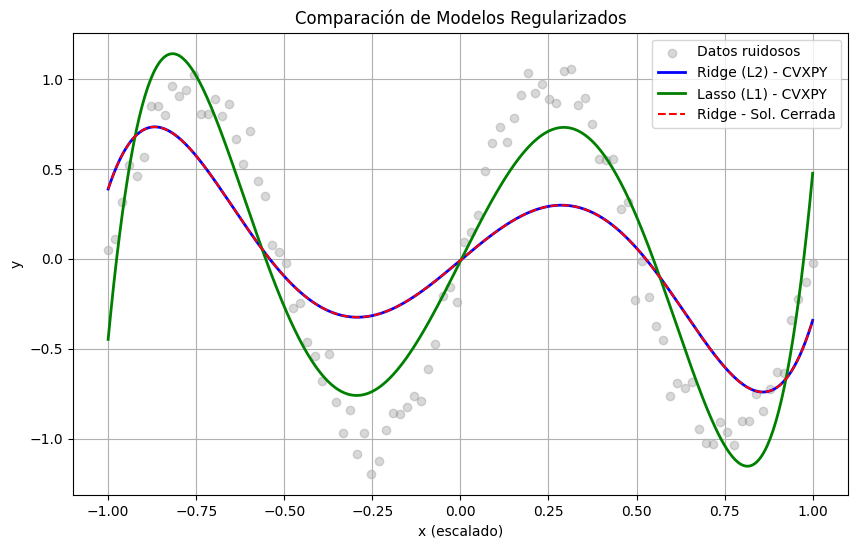

In [23]:
# 1. Asegurar que usamos la matriz de diseño correcta para x_fit (500 puntos)
# Necesitamos crear una matriz de Vandermonde para los puntos de visualización
A_fit = np.vander(x_fit, degree + 1, increasing=True)

# 2. Predicciones
y_fit_l2 = np.polyval(coeff_ridge_cvx[::-1], x_fit)   # Usando los de CVXPY
y_fit_l1 = np.polyval(coeff_lasso[::-1], x_fit)       # Usando Lasso
y_fit_ridge_closed = A_fit @ coeff_ridge_closed       # Solución cerrada (forma matricial)

# 3. Comprobación de dimensiones
print(f"Forma de x_fit: {x_fit.shape}")
print(f"Forma de y_fit_ridge_closed: {y_fit_ridge_closed.shape}")

# 4. Representación final
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y, alpha=0.3, label="Datos ruidosos", color='gray')
plt.plot(x_fit, y_fit_l2, label="Ridge (L2) - CVXPY", color='blue', linewidth=2)
plt.plot(x_fit, y_fit_l1, label="Lasso (L1) - CVXPY", color='green', linewidth=2)
plt.plot(x_fit, y_fit_ridge_closed, '--', label="Ridge - Sol. Cerrada", color='red')

plt.title("Comparación de Modelos Regularizados")
plt.xlabel("x (escalado)")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

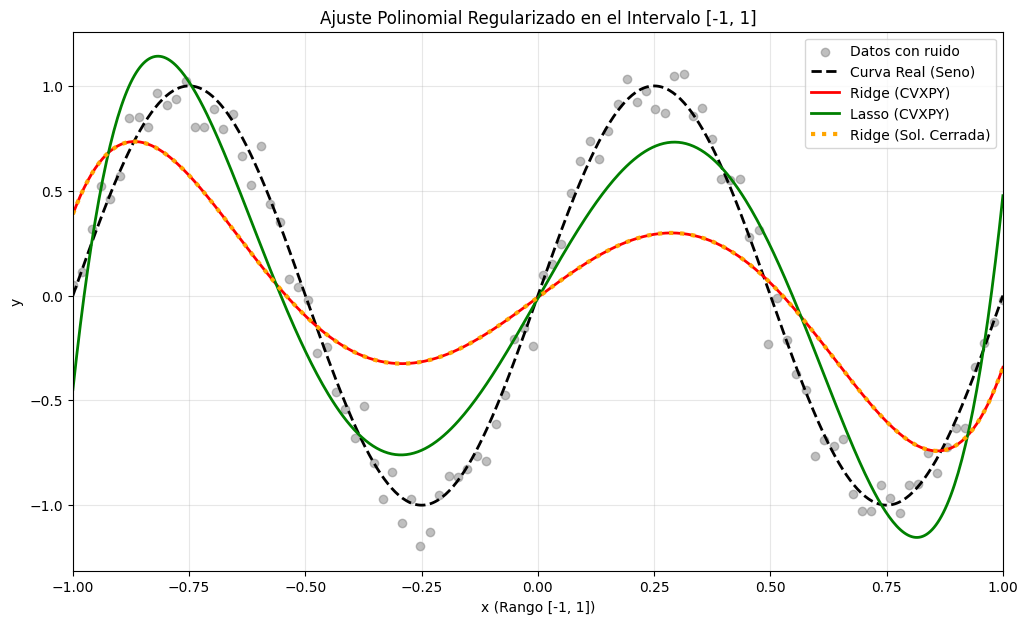

In [26]:
# --- Representación de resultados final (Rango -1 a 1) ---

# 1. Generar eje x_fit directamente en el rango [-1, 1]
x_fit_direct = np.linspace(-1, 1, 500)

# 2. Re-generar matriz de diseño para este rango
A_fit_11 = np.vander(x_fit_direct, degree + 1, increasing=True)

# 3. Calcular predicciones para el nuevo eje
y_fit_l2_11 = np.polyval(coeff_ridge_cvx[::-1], x_fit_direct)
y_fit_l1_11 = np.polyval(coeff_lasso[::-1], x_fit_direct)
y_fit_ridge_closed_11 = A_fit_11 @ coeff_ridge_closed

plt.figure(figsize=(12, 7))

# Datos originales (que ya están en x_scaled entre -1 y 1)
plt.scatter(x_scaled, y, label="Datos con ruido", alpha=0.5, color="gray")

# Curva real: como x_scaled = 2x - 1, entonces x = (x_scaled + 1) / 2
# Evaluamos el seno original en función de este eje [-1, 1]
y_true_11 = np.sin(4 * np.pi * ((x_fit_direct + 1) / 2))
plt.plot(x_fit_direct, y_true_11, label="Curva Real (Seno)", color="black", linestyle="--", linewidth=2)

# Curvas ajustadas
plt.plot(x_fit_direct, y_fit_l2_11, label="Ridge (CVXPY)", color="red", linewidth=2)
plt.plot(x_fit_direct, y_fit_l1_11, label="Lasso (CVXPY)", color="green", linewidth=2)
plt.plot(x_fit_direct, y_fit_ridge_closed_11, label="Ridge (Sol. Cerrada)", 
         color="orange", linestyle=":", linewidth=3)

# Forzar límites del eje X
plt.xlim([-1, 1])

plt.legend()
plt.xlabel("x (Rango [-1, 1])")
plt.ylabel("y")
plt.title("Ajuste Polinomial Regularizado en el Intervalo [-1, 1]")
plt.grid(True, alpha=0.3)
plt.show()

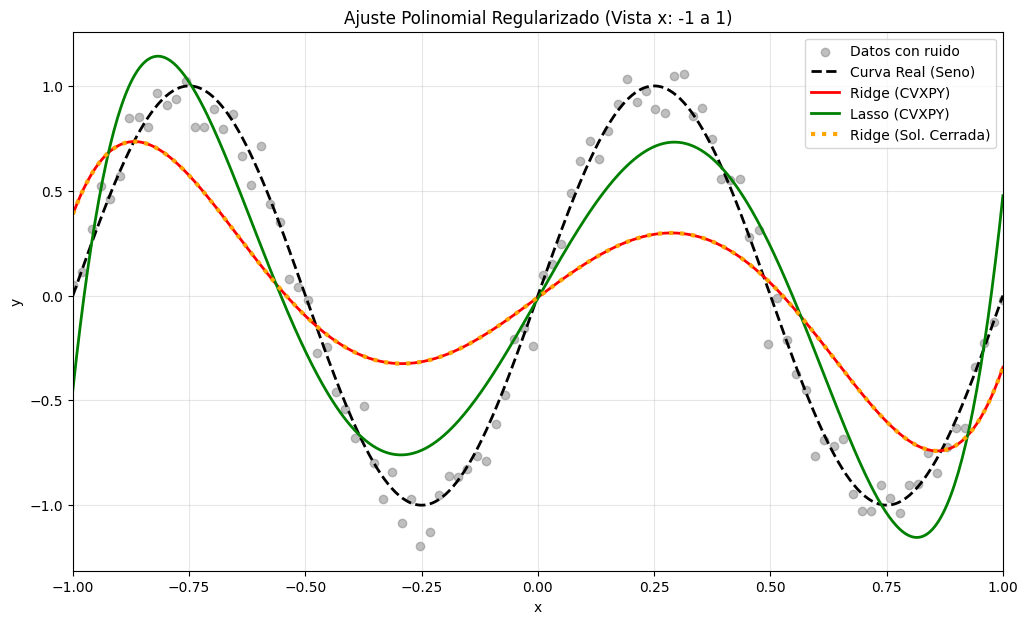

In [28]:
# --- Representación final restringida a x = [-1, 1] ---

# 1. Definir el eje X para la gráfica directamente en el rango deseado
x_grafica = np.linspace(-1, 1, 500)

# 2. Generar la matriz de diseño para las predicciones en este rango
A_grafica = np.vander(x_grafica, degree + 1, increasing=True)

# 3. Calcular las predicciones para cada modelo
y_fit_l2_graf = np.polyval(coeff_ridge_cvx[::-1], x_grafica)
y_fit_l1_graf = np.polyval(coeff_lasso[::-1], x_grafica)
y_fit_closed_graf = A_grafica @ coeff_ridge_closed

plt.figure(figsize=(12, 7))

# Graficar los datos de entrenamiento (que ya están escalados a [-1, 1])
plt.scatter(x_scaled, y, label="Datos con ruido", alpha=0.5, color="gray")

# Graficar la curva real (ajustando la frecuencia para el nuevo dominio)
y_real_graf = np.sin(4 * np.pi * ((x_grafica + 1) / 2))
plt.plot(x_grafica, y_real_graf, label="Curva Real (Seno)", color="black", linestyle="--", linewidth=2)

# Graficar los modelos ajustados
plt.plot(x_grafica, y_fit_l2_graf, label="Ridge (CVXPY)", color="red", linewidth=2)
plt.plot(x_grafica, y_fit_l1_graf, label="Lasso (CVXPY)", color="green", linewidth=2)
plt.plot(x_grafica, y_fit_closed_graf, label="Ridge (Sol. Cerrada)", color="orange", linestyle=":", linewidth=3)

# Restringir estrictamente la vista
plt.xlim([-1, 1])

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste Polinomial Regularizado (Vista x: -1 a 1)")
plt.grid(True, alpha=0.3)
plt.show()

Columnas detectadas: ['Temperature', 'Sales']
La columna 'Ice Cream Sales' no existe. Usando 'Sales' como y.


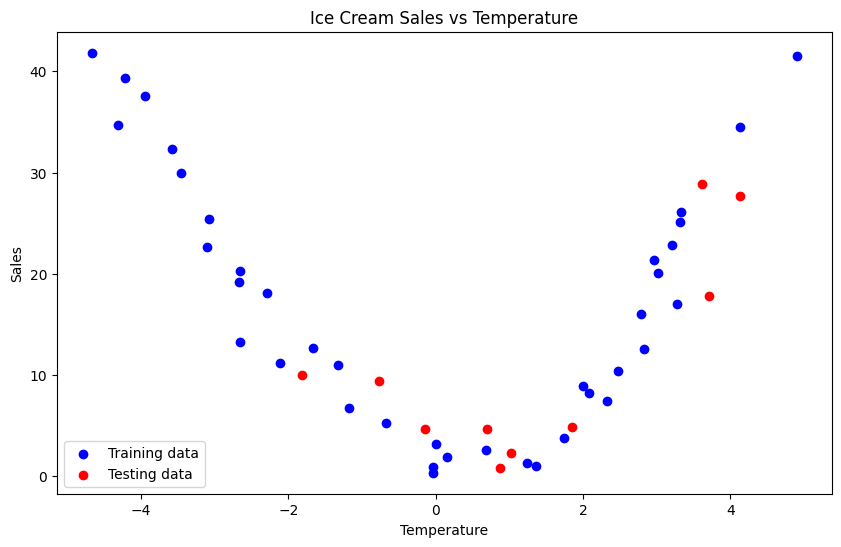

In [33]:
# 1. Verificamos los nombres de las columnas para evitar el KeyError
print("Columnas detectadas:", data.columns.tolist())

# 2. Selección flexible de columnas
# Intentamos usar tus nombres, y si fallan, usamos la posición
try:
    X = data[['Temperature']].values
except KeyError:
    print("¡Ojo! La columna 'Temperature' no existe. Usando la primera columna como X.")
    X = data.iloc[:, [0]].values # Toma la columna 0

try:
    y = data['Ice Cream Sales'].values
except KeyError:
    # Si 'Ice Cream Sales' falla, intentamos con 'Revenue' o la segunda columna
    posibles_nombres = ['Revenue', 'Sales', 'sales', 'Ice_cream_selling_data']
    col_encontrada = next((c for c in posibles_nombres if c in data.columns), data.columns[1])
    print(f"La columna 'Ice Cream Sales' no existe. Usando '{col_encontrada}' como y.")
    y = data[col_encontrada].values

# 3. Ahora sí, dividimos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Representación visual
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Ice Cream Sales vs Temperature')
plt.legend()
plt.show()

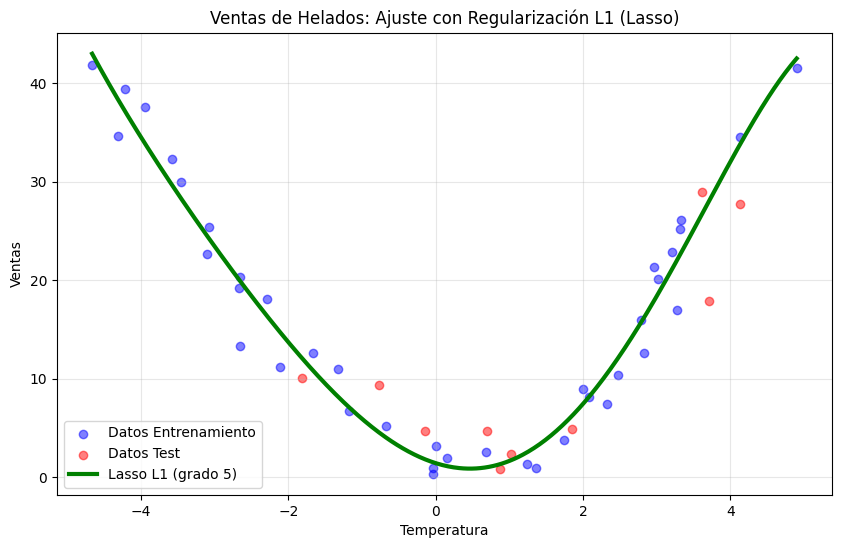

Coeficientes Lasso L1:
[-1.2708 -0.5219  1.4831  0.3766 -0.1188 -0.0759]


In [34]:
import cvxpy as cp
from sklearn.preprocessing import StandardScaler

# 1. Normalización de los datos (Crucial para Lasso)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# 2. Construcción de la matriz de diseño (Vandermonde) de grado 5
# Usamos los datos de entrenamiento escalados
A_train = np.vander(X_train_scaled.flatten(), degree + 1, increasing=True)

# 3. Optimización con CVXPY (Lasso: L1-norm)
lambda_lasso = 0.1
beta_l1 = cp.Variable(degree + 1)

# Función de costo: Error cuadrático + lambda * ||beta||_1
# No solemos penalizar el bias (beta[0]), pero por simplicidad penalizaremos todos
cost_l1 = cp.sum_squares(A_train @ beta_l1 - y_train_scaled) + lambda_lasso * cp.norm1(beta_l1)

prob_l1 = cp.Problem(cp.Minimize(cost_l1))
prob_l1.solve()

coeff_l1_icecream = beta_l1.value

# 4. Predicción para visualización
# Creamos un eje X continuo para la curva suave
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_scaled = scaler_X.transform(X_range)
A_range = np.vander(X_range_scaled.flatten(), degree + 1, increasing=True)

# Predecimos y devolvemos a la escala original de ventas
y_pred_scaled = A_range @ coeff_l1_icecream
y_pred_unscaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# 5. Representación de resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Datos Test')
plt.plot(X_range, y_pred_unscaled, color='green', linewidth=3, label=f'Lasso L1 (grado {degree})')

plt.xlabel('Temperatura')
plt.ylabel('Ventas')
plt.title('Ventas de Helados: Ajuste con Regularización L1 (Lasso)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar coeficientes (verás que algunos tienden a cero)
print("Coeficientes Lasso L1:")
print(np.round(coeff_l1_icecream, 4))



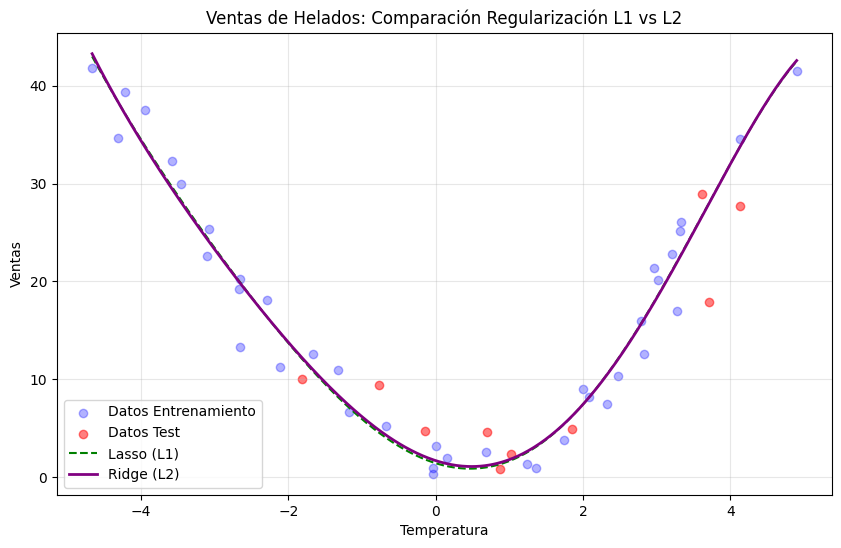

Magnitud de coeficientes (Norma L2):
Lasso (L1): 2.0612
Ridge (L2): 2.0257


In [35]:
# 1. Definición del problema Ridge (L2) con CVXPY
lambda_ridge = 0.1
beta_l2 = cp.Variable(degree + 1)

# Función de costo: Error cuadrático + lambda * ||beta||_2^2
# Usamos cp.sum_squares para la norma L2 al cuadrado
cost_l2 = cp.sum_squares(A_train @ beta_l2 - y_train_scaled) + lambda_ridge * cp.sum_squares(beta_l2)

prob_l2 = cp.Problem(cp.Minimize(cost_l2))
prob_l2.solve()

coeff_l2_icecream = beta_l2.value

# 2. Predicción para el modelo Ridge
y_pred_scaled_l2 = A_range @ coeff_l2_icecream
y_pred_unscaled_l2 = scaler_y.inverse_transform(y_pred_scaled_l2.reshape(-1, 1))

# 3. Representación comparativa (L1 vs L2)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.3, label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Datos Test')

# Curvas
plt.plot(X_range, y_pred_unscaled, color='green', label='Lasso (L1)', linestyle='--')
plt.plot(X_range, y_pred_unscaled_l2, color='purple', label='Ridge (L2)', linewidth=2)

plt.xlabel('Temperatura')
plt.ylabel('Ventas')
plt.title('Ventas de Helados: Comparación Regularización L1 vs L2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Comparación de la magnitud de los coeficientes
print("Magnitud de coeficientes (Norma L2):")
print(f"Lasso (L1): {np.linalg.norm(coeff_l1_icecream):.4f}")
print(f"Ridge (L2): {np.linalg.norm(coeff_l2_icecream):.4f}")



<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_39911/3372146349.py:28: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Parámetro de regularización $\lambda$')


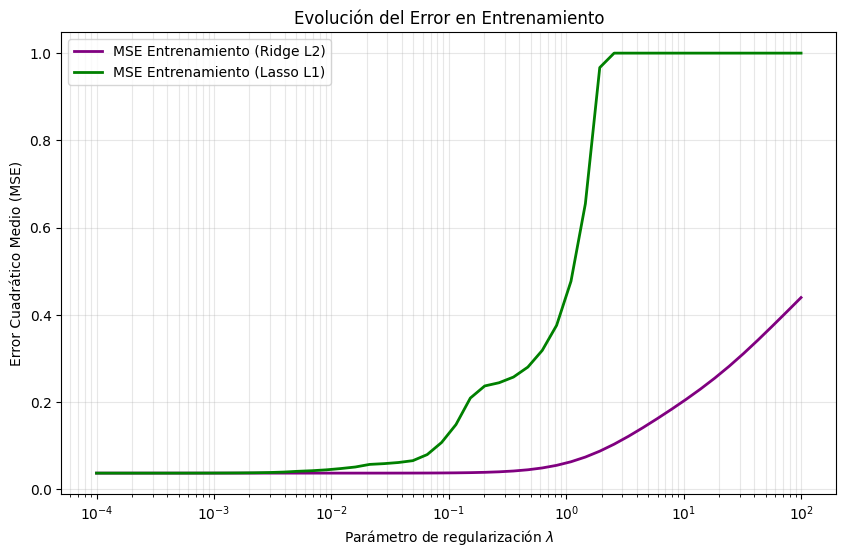

In [36]:
# --- Evolución del error en entrenamiento vs Lambda ---

# 1. Definimos un rango de valores para lambda (desde muy pequeño a muy grande)
lambdas = np.logspace(-4, 2, 50)
train_errors_l2 = []
train_errors_l1 = []

# Usamos las matrices de diseño A_train y etiquetas y_train_scaled ya definidas
for l in lambdas:
    # Ajuste Ridge (L2) - Solución cerrada o sklearn
    # beta = (A.T @ A + l * I)^-1 @ A.T @ y
    I = np.eye(degree + 1)
    beta_l2 = np.linalg.solve(A_train.T @ A_train + l * I, A_train.T @ y_train_scaled)
    train_errors_l2.append(np.mean((A_train @ beta_l2 - y_train_scaled)**2))
    
    # Ajuste Lasso (L1) - Usando sklearn para eficiencia en el loop
    from sklearn.linear_model import Lasso
    lasso_model = Lasso(alpha=l, max_iter=10000)
    lasso_model.fit(A_train, y_train_scaled)
    train_errors_l1.append(np.mean((lasso_model.predict(A_train) - y_train_scaled)**2))

# 2. Representación gráfica
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_errors_l2, label='MSE Entrenamiento (Ridge L2)', color='purple', lw=2)
plt.plot(lambdas, train_errors_l1, label='MSE Entrenamiento (Lasso L1)', color='green', lw=2)

plt.xscale('log') # Escala logarítmica para ver mejor el comportamiento
plt.xlabel('Parámetro de regularización $\lambda$')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error en Entrenamiento')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 1. Preparación de matrices (Asegúrate de haber ejecutado el split de X_train, X_test antes)
# Escalamos los datos (basándonos siempre en la media/desviación de TRAIN)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test) # Usamos transform, no fit_transform

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Creamos las matrices de diseño (Vandermonde) para grado 5
# A_train para entrenamiento y A_test para validación
A_train = np.vander(X_train_scaled.flatten(), degree + 1, increasing=True)
A_test = np.vander(X_test_scaled.flatten(), degree + 1, increasing=True)

# 2. Cálculo de la evolución del error
lambdas = np.logspace(-4, 2, 50)
train_errors_l2, test_errors_l2 = [], []
train_errors_l1, test_errors_l1 = [], []

for l in lambdas:
    # --- Ridge (L2) ---
    I = np.eye(degree + 1)
    beta_l2 = np.linalg.solve(A_train.T @ A_train + l * I, A_train.T @ y_train_scaled)
    # Errores MSE
    train_errors_l2.append(np.mean((A_train @ beta_l2 - y_train_scaled)**2))
    test_errors_l2.append(np.mean((A_test @ beta_l2 - y_test_scaled)**2))
    
    # --- Lasso (L1) ---
    lasso = Lasso(alpha=l, max_iter=10000)
    lasso.fit(A_train, y_train_scaled)
    # Errores MSE
    train_errors_l1.append(np.mean((lasso.predict(A_train) - y_train_scaled)**2))
    test_errors_l1.append(np.mean((lasso.predict(A_test) - y_test_scaled)**2))

# 3. Representación visual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lambdas, train_errors_l2, '--', label='Train Ridge', color='purple')
plt.plot(lambdas, test_errors_l2, label='Test Ridge', color='red', lw=2)
plt.xscale('log')
plt.title('Evolución Error Ridge (L2)')
plt.legend(); plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(lambdas, train_errors_l1, '--', label='Train Lasso', color='green')
plt.plot(lambdas, test_errors_l1, label='Test Lasso', color='orange', lw=2)
plt.xscale('log')
plt.title('Evolución Error Lasso (L1)')
plt.legend(); plt.grid(True, alpha=0.3)

plt.show()

NameError: name 'X_train' is not defined